# Project: Investigate a Dataset - [European Leagues Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **Dataset Description:**

> This European Leagues Soccer databse comes from Kaggle, It Contains data about Teams, players & League matches from 2008 to 2016 & It is well suited for data aanlaysis & Machine learning.

> **Question(s) for Analysis:**
<ul>
<li><a href="#Q01">Question 1 (What is the the league with the highest goals scored)</a></li>
<li><a href="#Q02">Question 2 (Highest Goals Scored league (LIGA BBVA) per Season)</a></li>
<li><a href="#Q03">Question 3 (Top 10 Home Teams Points in Top 6 Leagues for season 2015/2016)</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
% matplotlib inline
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


#### Data Cleaning

 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# Loading Match & Country CSV Files
df_match=pd.read_csv('Match.csv')
df_match.head(1)
df_country=pd.read_csv('Country.csv')
df_country.head(1)
# Modifying Column Names in Country DataFrame to match the column name in the Match DataFrame
df_country=df_country.rename(columns = {'name' : 'country_name'})
df_country=df_country.rename(columns = {'id' : 'country_id'})
df_country.head(1)
#Merging the Country Data frame with the match data frame
df_mc= df_country.merge(df_match, left_on='country_id', right_on='country_id', how='inner')
df_mc.head(1)
# Loading League CSV File
df_league=pd.read_csv('League.csv')
df_league.head(1)
# Modifying Column Names in League DataFrame to match the column name in the Match DataFrame
df_league.drop('country_id', axis=1, inplace=True)
df_league=df_league.rename(columns = {'name' : 'league_name'})
df_league=df_league.rename(columns = {'id' : 'league_id'})
#Merging the League Data frame with the MC data frame
df_mcl=df_league.merge(df_mc, left_on='league_id', right_on='league_id', how='inner')
df_mcl.head(1)
# Loading Team CSV File
df_team=df_league=pd.read_csv('Team.csv')
df_team.head(1)
# Modifying Column Names in Team DataFrame to match the column name in the Match DataFrame
df_team=df_team.rename(columns = {'id' : 'team_id'})
#Merging the League Data frame with the MCL data frame
df_mclt=df_team.merge(df_mcl, left_on='team_api_id', right_on='home_team_api_id', how='inner')
df_mclt.head(1)
# Modifying Column Names in MCL DataFrame to merge the away team names withour conflict
df_mclt=df_mclt.rename(columns = {'team_long_name' : 'home_team_long_name'})
df_mclt=df_mclt.rename(columns = {'team_short_name' : 'home_team_short_name'})
df_mclt.head(1)
#Merging the League Data frame with the MCL data frame
df_mcltt=df_team.merge(df_mclt, left_on='team_api_id', right_on='away_team_api_id', how='inner')
df_mcltt.head(1)
# Modifying Column Names in MCL DataFrame
df_mcltt=df_mcltt.rename(columns = {'team_long_name' : 'away_team_long_name'})
df_mcltt=df_mcltt.rename(columns = {'team_short_name' : 'away_team_short_name'})
df_mcltt=df_mcltt.rename(columns = {'id' : 'match_id'})
df_mcltt.head(1)
# adding For Loop to count the rows number to find rows needed to be droppped from dataframe
for i, v in enumerate(df_mcltt.columns):
    print(i, v)
#Dropping Unnecessary Data from Dataframe
df_mcltt=df_mcltt.drop(df_mcltt.iloc[:,23:127], axis=1)
df_mcltt=df_mcltt.drop(df_mcltt.columns[[0, 1, 2,5,6,7,10,12,18,19,20]], axis=1)
df_mcltt.head(1)
#Exporting data Frame to a new CSV File
df_mcltt.to_csv('Eurpean Leagues Match Data.csv', index=False)
# types and look for instances of missing or possibly errant data.
df_mcltt.shape
df_mcltt.info()
df_mcltt.isnull().sum()
print(df_mcltt.duplicated().sum())
df_mcltt.describe()

0 team_id_x
1 team_api_id_x
2 team_fifa_api_id_x
3 away_team_long_name
4 away_team_short_name
5 team_id_y
6 team_api_id_y
7 team_fifa_api_id_y
8 home_team_long_name
9 home_team_short_name
10 league_id
11 league_name
12 country_id
13 country_name
14 match_id
15 season
16 stage
17 date
18 match_api_id
19 home_team_api_id
20 away_team_api_id
21 home_team_goal
22 away_team_goal
23 home_player_X1
24 home_player_X2
25 home_player_X3
26 home_player_X4
27 home_player_X5
28 home_player_X6
29 home_player_X7
30 home_player_X8
31 home_player_X9
32 home_player_X10
33 home_player_X11
34 away_player_X1
35 away_player_X2
36 away_player_X3
37 away_player_X4
38 away_player_X5
39 away_player_X6
40 away_player_X7
41 away_player_X8
42 away_player_X9
43 away_player_X10
44 away_player_X11
45 home_player_Y1
46 home_player_Y2
47 home_player_Y3
48 home_player_Y4
49 home_player_Y5
50 home_player_Y6
51 home_player_Y7
52 home_player_Y8
53 home_player_Y9
54 home_player_Y10
55 home_player_Y11
56 away_player_Y1
57 aw

,match_id,stage,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,18.242773,1.544594,1.160938
std,7499.635658,10.407354,1.297158,1.142110
min,1.000000,1.000000,0.000000,0.000000
25%,6495.500000,9.000000,1.000000,0.000000
50%,12990.000000,18.000000,1.000000,1.000000
75%,19484.500000,27.000000,2.000000,2.000000
max,25979.000000,38.000000,10.000000,9.000000


<a id='eda'></a>
## Exploratory Data Analysis


<a id='Q01'></a>
### Question 1 (What is the the league with the highest goals scored)

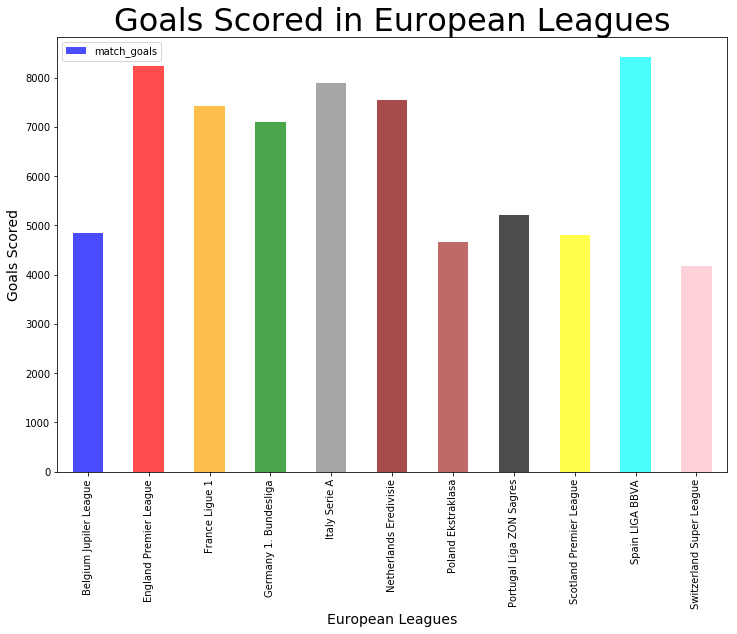

In [4]:
#adding Total goals in each match
match_goals=df_mcltt.home_team_goal + df_mcltt.away_team_goal
#adding the new variable to the data frame
df_mcltt['match_goals'] =match_goals
df_mcltt.head(1)
#Grouping to get Total goals for each league
df_mcltt.groupby('league_name')['match_goals'].sum()
league_goals=df_mcltt.groupby('league_name')['match_goals'].sum()
colors=['blue','red','orange','green','grey','maroon','brown','black','yellow','cyan','pink']
league_goals.plot(kind='bar',figsize=(12,8),alpha=0.7,color=colors)
plt.ylabel('Goals Scored',fontsize=14)
plt.xlabel('European Leagues',fontsize=14)
plt.title('Goals Scored in European Leagues',fontsize=32)
plt.legend();

>The Sapin LIGA & England Premier League have the most goals scored of all times.

>We Will be studying the Performance of SPAI League over the Seasons.

<a id='Q02'></a>
### Question 2  (Highest Goals Scored league (LIGA BBVA) per Season)

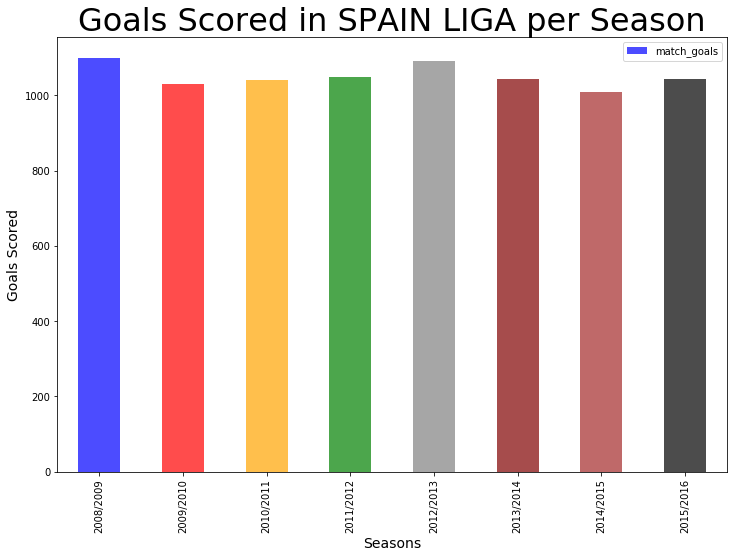

In [5]:
#Filtering on SPAIN LIGA BBVA & groubing by season & match goals
pl_goals=df_mcltt.query('league_name =="Spain LIGA BBVA"').groupby('season')['match_goals'].sum()
pl_goals.plot(kind='bar',figsize=(12,8),alpha=0.7,color=colors)
plt.ylabel('Goals Scored',fontsize=14)
plt.xlabel('Seasons',fontsize=14)
plt.title('Goals Scored in SPAIN LIGA per Season',fontsize=32)
plt.legend();

>Season 2008/2009 & 2012/203 has the most goals scored in SPAIN LIGA

<a id='Q03'></a>
### Question 3  (Top 10 Home Teams Points in Top 6 Leagues for season 2015/2016)

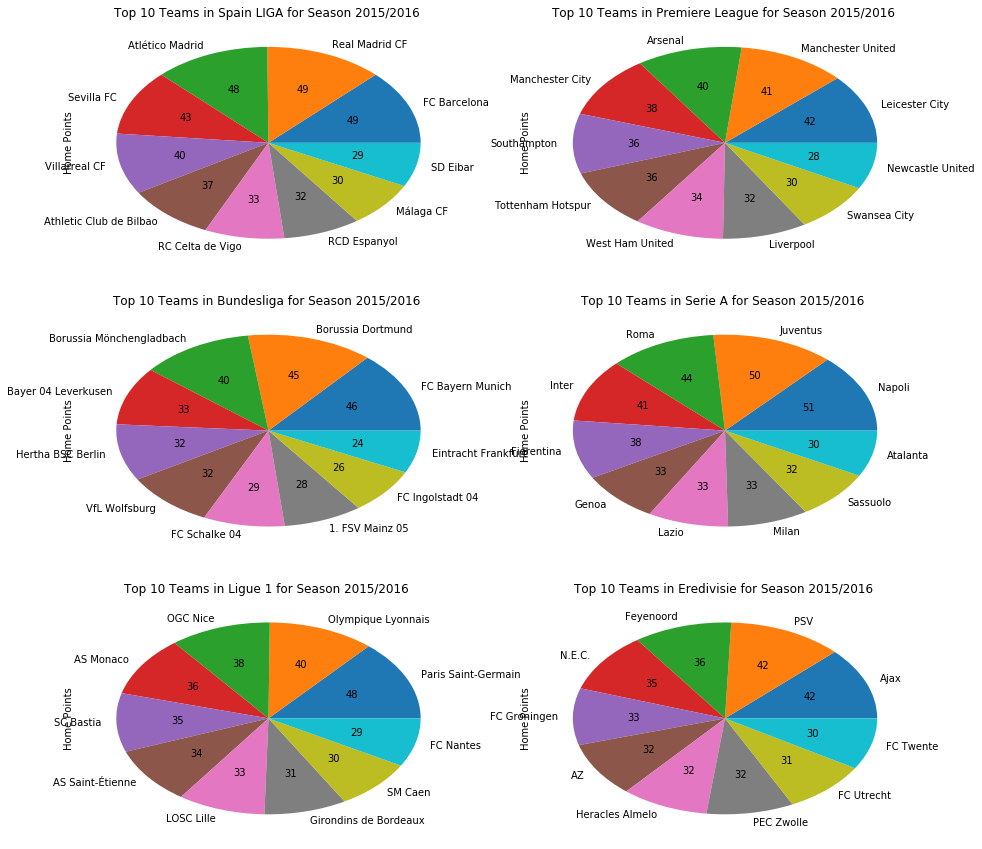

In [158]:
#Calculating Points for each Team in each league for all seasons
home_pt=[]
away_pt=[]
goal_diff=df_mcltt.home_team_goal - df_mcltt.away_team_goal
df_mcltt['goal_diff'] =goal_diff
#for loop to Calulate points for each Home Team
for goal_diff in df_mcltt.goal_diff:
    if goal_diff > 0:
        home_pt.append(3) and away_pt.append(0)
    elif goal_diff < 0:
        home_pt.append(0) and away_pt.append(3)
    else:
        home_pt.append(1) and away_pt.append(1)

df_mcltt['home_pt']=home_pt
df_mcltt.head(1)
#Grouping & Filtering League Home Teams Points
top_sp_10=df_mcltt.query('season =="2015/2016"').query('league_name =="Spain LIGA BBVA"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_gb_10=df_mcltt.query('season =="2015/2016"').query('league_name =="England Premier League"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_de_10=df_mcltt.query('season =="2015/2016"').query('league_name =="Germany 1. Bundesliga"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_it_10=df_mcltt.query('season =="2015/2016"').query('league_name =="Italy Serie A"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_fr_10=df_mcltt.query('season =="2015/2016"').query('league_name =="France Ligue 1"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_ne_10=df_mcltt.query('season =="2015/2016"').query('league_name =="Netherlands Eredivisie"').groupby('home_team_long_name')['home_pt'].sum().nlargest(n=10)
top_10=pd.concat([top_sp_10,top_gb_10,top_de_10,top_it_10,top_fr_10])
#Adding a function to add values instead of percentage inside Pie Charts
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
#adding Multi Subplots to add Pie Chart for each League Top 10
fig, axes=plt.subplots(3, 2,figsize=(100,60))
top_sp_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_sp_10),ax=axes[0,0]);
axes[0,0].set_title('Top 10 Teams in Spain LIGA for Season 2015/2016 ', fontsize = 12)
top_gb_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_gb_10),ax=axes[0,1]);
axes[0,1].set_title('Top 10 Teams in Premiere League for Season 2015/2016 ', fontsize = 12)
top_de_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_de_10),ax=axes[1,0]);
axes[1,0].set_title('Top 10 Teams in Bundesliga for Season 2015/2016 ', fontsize = 12)
top_it_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_it_10),ax=axes[1,1]);
axes[1,1].set_title('Top 10 Teams in Serie A for Season 2015/2016 ', fontsize = 12)
top_fr_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_fr_10),ax=axes[2,0]);
axes[2,0].set_title('Top 10 Teams in Ligue 1 for Season 2015/2016 ', fontsize = 12)
top_ne_10.plot(kind='pie', figsize=(15,15), fontsize=10,label='Home Points',autopct =autopct_format(top_ne_10),ax=axes[2,1]);
axes[2,1].set_title('Top 10 Teams in Eredivisie for Season 2015/2016 ', fontsize = 12)
plt.show();

> The Premiere League & the Spain League has the most competition among the other 6 leagues for season 2015/2016

<a id='conclusions'></a>
## Conclusions


>The dataset was studied carefully to generate an observation for Top Teams in Saeson 2015/2016 using the dta ain Country, League, Team & Match Datasets excluding unnecessary & null data.

>The data has few limitations like missing data, repeated data & Player data couldn't be linked to the match data.


In [159]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0